# Statistical Analysis of Synthetically Generated Data

---



---






# **Task 0: Import Libraries**


---


1. *In this project, we wiill use the following libraries:*

  -   *Pandas:* To create and manipulate the synthetic dataset. For example, creating a DataFrame and calculating descriptive statistics.

  -   *NumPy:* To generate the synthetic data with specific distributions and to create random categorical data.

  -   *Matplotlib:* To plot histograms and other visualizations to understand the distribution of the data.

  -   *Seaborn:* To create KDE plots and box plots for a more detailed statistical analysis and to enhance the visual appeal of the plots.

In [2]:
# install libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Task 1: Data Generation**


---
1. ***Set random seed:***

 - Purpose: The np.random.seed function sets the seed for NumPy's random number generator.

 - Reproducibility: By setting a seed, we ensure that the sequence of random numbers generated is the same every time the code is run. This is crucial for reproducibility in experiments and analyses. The seed value 0 is arbitrary and can be any integer.


2. ***Generate 1000 data points from a normal distribution:***

 - Purpose: Defines the number of data points we want to generate.
 - Variable Declaration: Here, num_samples is assigned the value 1000. This variable will be used to generate data points.


In [3]:
# Set the random seed for reproducibility
np.random.seed(0)

# Generate 1000 data points from a normal distribution
num_samples = 1000


# Why Choose Normal Distributions?

- Normal distributions are used in synthetic data generation because they are a good approximation for many real-world phenomena.


***Code Breakdown:***

>- **np.random.normal** is used to generate random samples from a normal distribution.
- **loc** specifies the mean of the distribution.
- **scale** specifies the standard deviation of the distribution.
- **size** specifies the number of samples to generate.
- The **np.random.choice** function is suitable for generating categorical data, such as gender, because it allows you to randomly select elements from a specified list with specified probabilities using p = [0.5, 0.5]

In [4]:
# Generate data for each column
age = np.random.normal(loc=35, scale=10, size=num_samples)
height = np.random.normal(loc=170, scale=15, size=num_samples)
weight = np.random.normal(loc=70, scale=10, size=num_samples)
gender = np.random.choice(['Male', 'Female'], size=num_samples, p=[0.5, 0.5])
income = np.random.normal(loc=50000, scale=15000, size=num_samples)


# Why Create a DataFrame?
- Creating a DataFrame from generated data is an important step in data analysis, as it organizes data into a structured format suitable for further exploration, visualization, and modeling tasks.


In [5]:
# Create a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Height': height,
    'Weight': weight,
    'Gender': gender,
    'Income': income
})

# Display the first few rows of the DataFrame
print(df.head())

         Age      Height     Weight  Gender        Income
0  52.640523  178.339440  54.670789  Female  32268.449010
1  39.001572  183.387108  52.880298  Female  39257.329141
2  44.787380  163.665278  70.461351  Female  25376.690677
3  57.408932  171.570710  60.416255    Male  36649.616723
4  53.675580  173.420800  69.191884    Male  60412.650806


# **Task 2: Descriptive Statistics**


---
Using mean(), median(), std(), and var() functions, quick insights can be drawn.


In [6]:
# Calculate descriptive statistics (Mean, median, std deviation, variance)

descriptive_stats = {
    'Mean': df[['Age', 'Height', 'Weight', 'Income']].mean(),
    'Median': df[['Age', 'Height', 'Weight', 'Income']].median(),
    'Standard Deviation': df[['Age', 'Height', 'Weight', 'Income']].std(),
    'Variance': df[['Age', 'Height', 'Weight', 'Income']].var()
}

descriptive_stats_df = pd.DataFrame(descriptive_stats)

# Display the descriptive statistics

print(descriptive_stats_df)


                Mean        Median  Standard Deviation      Variance
Age        34.547433     34.419720            9.875270  9.752097e+01
Height    170.204254    170.390930           14.529666  2.111112e+02
Weight     69.487714     69.475022            9.545943  9.112502e+01
Income  50110.044879  49980.309142        15029.176279  2.258761e+08


In [7]:
# Calculate the mode for Gender
mode = df['Gender'].mode()[0]
print(mode)


Male


# Insights from Descriptive Statistics

- Age Distribution: The distribution of age appears relatively symmetrical with a slight skew towards higher ages, given that the mean is slightly higher than the median.

- Height Distribution: Heights show a more symmetric distribution around the mean, with moderate variability.

- Weight Distribution: Similar to height, weights are symmetrically distributed around the mean, indicating consistency in weight measurements.

- Income Distribution: Income exhibits a right-skewed distribution, where the mean is higher than the median. There is substantial variability in income levels among the samples, as indicated by the high variance.

- Gender Composition: The dataset contains more males than females, as 'Male' is the mode of the gender variable.

# **Task 3: Data Visualization**


---




# Histograms:
- Histograms provide a visual representation of the frequency distribution of data points in each variable.

*Insights from histograms:*


**Age:**

- The distribution is roughly symmetric with a slight right skew.
The majority of the data points are concentrated around the mean (35), with a normal spread.

**Height:**

- The distribution appears to be symmetric and centered around the mean (170 cm).
Most data points are close to the mean, with a normal spread, indicating a typical height distribution.

**Weight:**

- The distribution is symmetric and centered around the mean (70 kg).
The spread is normal, indicating a normative weight distribution.

**Income:**

- The distribution is slightly right-skewed.
While most data points are concentrated around the mean (50,000), there are a few data points with higher income values, indicating a higher spread.

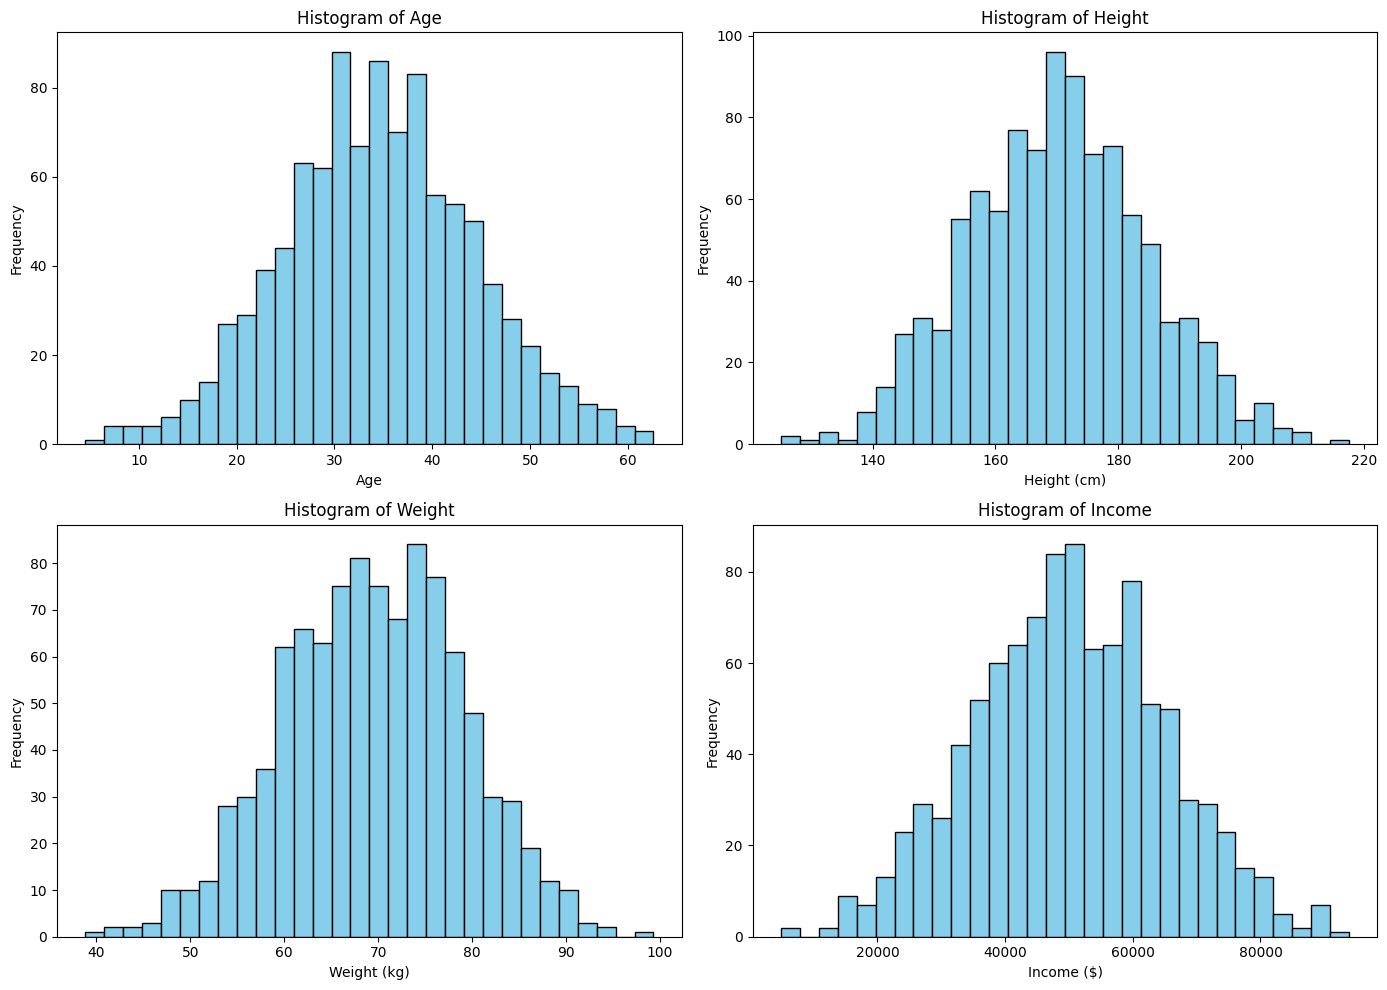

In [8]:
# 4. Visualize the distributions

# Plot histograms
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.hist(df['Age'], bins=30, color='Skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['Height'], bins=30, color='Skyblue', edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df['Weight'], bins=30, color='Skyblue', edgecolor='black')
plt.title('Histogram of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df['Income'], bins=30, color='Skyblue', edgecolor='black')
plt.title('Histogram of Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# KDE (Kernel Density Estimation) Plots:
- KDE plots provide a smooth estimate of the probability density function of the variable.

*Insights from KDE plots*

**Age:**

- The KDE plot shows a smooth, slightly right-skewed distribution.
The peak is around the mean (35), confirming the histogram's interpretation.

**Height:**

- The KDE plot shows a smooth, symmetric distribution centered around the mean (170 cm).
This indicates that height values are normally distributed without significant skewness.

**Weight:**

- The KDE plot is symmetric and peaks around the mean (70 kg).
The distribution appears normal without significant skewness.

**Income:**

- The KDE plot shows a smooth, right-skewed distribution.
The peak is around the mean (50,000), but tailing is occuring towards higher income values, indicating a wider spread.

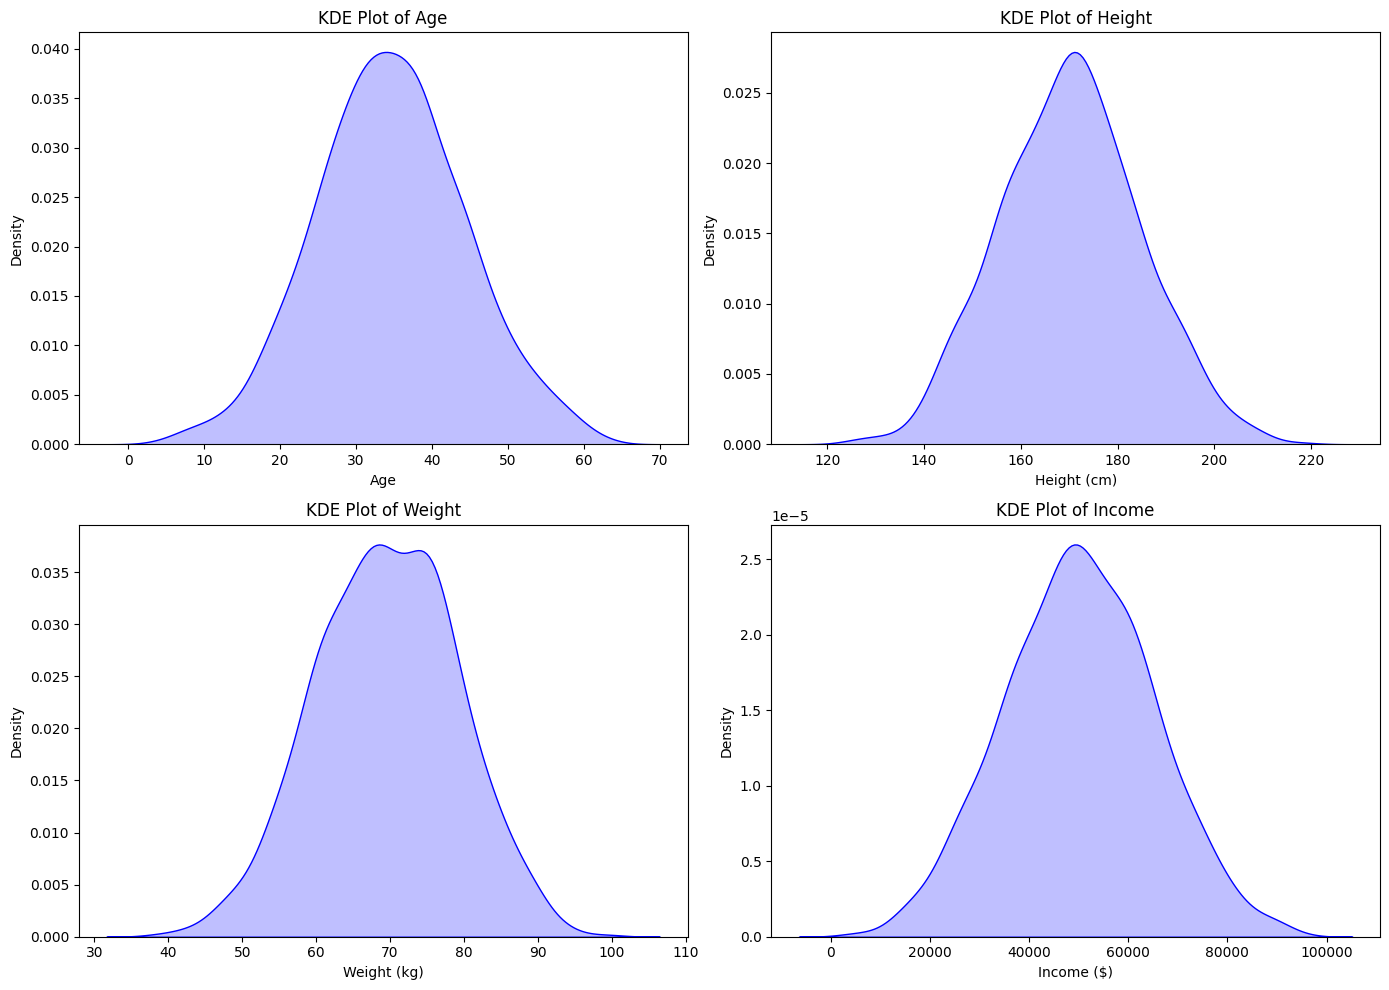

In [9]:
# Plot KDE plots
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(df['Age'], fill=True, color='blue')
plt.title('KDE Plot of Age')
plt.xlabel('Age')

plt.subplot(2, 2, 2)
sns.kdeplot(df['Height'], fill=True, color='blue')
plt.title('KDE Plot of Height')
plt.xlabel('Height (cm)')

plt.subplot(2, 2, 3)
sns.kdeplot(df['Weight'], fill=True, color='blue')
plt.title('KDE Plot of Weight')
plt.xlabel('Weight (kg)')

plt.subplot(2, 2, 4)
sns.kdeplot(df['Income'], fill=True, color='blue')
plt.title('KDE Plot of Income')
plt.xlabel('Income ($)')

plt.tight_layout()
plt.show()


# General conclusions on histogram and KDE plots

- The histogram and KDE plots confirm the descriptive statistics and provide a visual understanding of the data distribution, which is important for further analysis, such as identifying outliers.

- Smoothness of the KDE plots indicate that there is little variability or gaps in the data.


# Boxplots:
- Boxplots provide a visual summary of the central tendency, variability, and distribution shape of a dataset, as well as highlighting potential outliers.

*Insights from the boxplot:*

**Age:**
- Outliers below 10 and above 60 might indicate rare ages in the dataset, which can be important for understanding the age distribution.

**Height:**
- Outliers below 130 cm and above 200 cm indicate exceptionally short or tall individuals, respectively.

**Weight:**
- Outliers below 45 kg and above 95 kg suggest exceptionally light or heavy individuals.

**Income:**
- Outliers below 10000 and above 90000 highlight individuals with exceptionally low or high incomes.

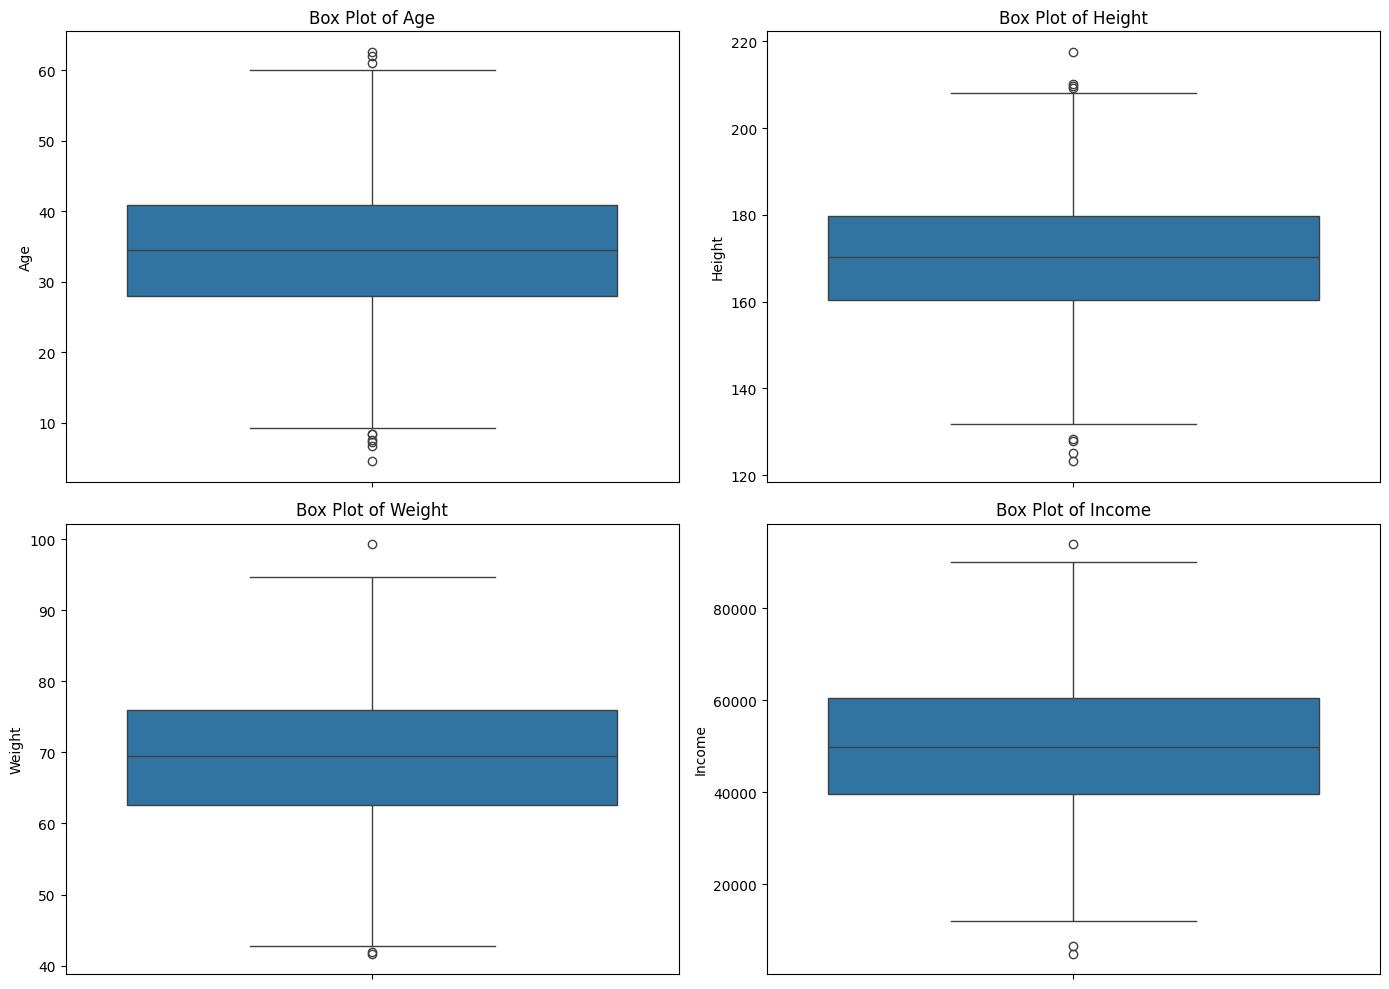

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['Height'])
plt.title('Box Plot of Height')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['Weight'])
plt.title('Box Plot of Weight')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['Income'])
plt.title('Box Plot of Income')

plt.tight_layout()
plt.show()

# **Task 4: Correlation Analysis**


---



The correlation matrix shows the correlations between age, height, weight, and income. Here are some of the relationships that can be inferred from the matrix:

**Age and Height:**
- There is a weak negative correlation between age and height (-0.05). This means that there is a very slight tendency for taller people to be younger.

**Age and Weight:**
- There is a very weak positive correlation between age and weight (0.01). This means that there is a very slight tendency for people to weigh more as they get older.

**Height and Weight:**
- There is a weak positive correlation between height and weight (0.04). This means that there is a very slight tendency for taller people to weigh more.

**Income and Weight:**
- There is a positive correlation between income and weight (0.6). This means that there is a moderate tendency for people with higher incomes to weigh more.

             Age    Height    Weight    Income
Age     1.000000 -0.053809 -0.047512  0.044500
Height -0.053809  1.000000  0.012237  0.001537
Weight -0.047512  0.012237  1.000000 -0.030999
Income  0.044500  0.001537 -0.030999  1.000000


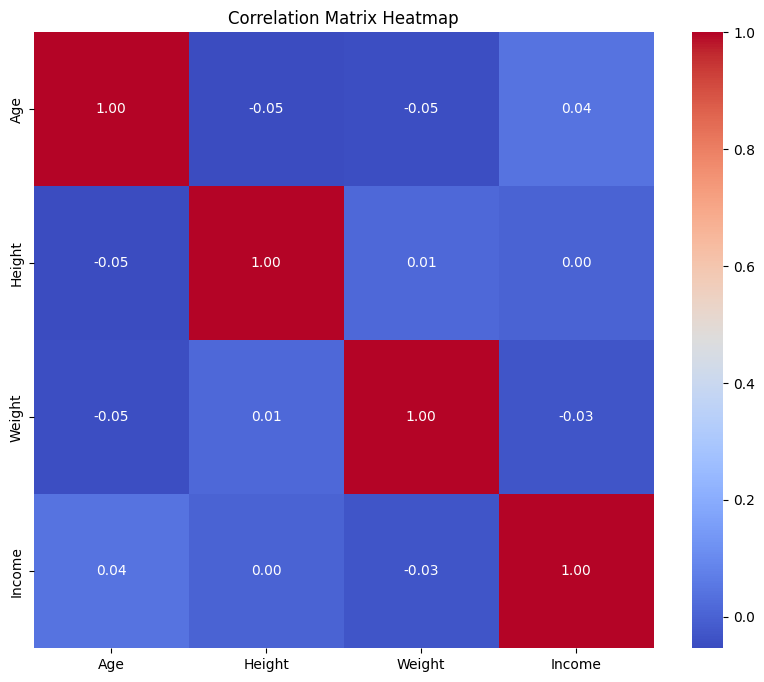

In [ ]:
# Calculate the Pearson correlation coefficient
correlation_matrix = df[['Age', 'Height', 'Weight', 'Income']].corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
#Install the library

!pip install scipy
import pandas as pd
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

# **Task 5: Inferential Statistics**


---

***Null Hypothesis (H0):***
- There is no difference in the mean Income between Males and Females.

***Alternative Hypothesis (H1):***
- There is a difference in the mean Income between Males and Females.


In [ ]:
# Separate Income data by gender
income_male = df[df['Gender'] == 'Male']['Income']
income_female = df[df['Gender'] == 'Female']['Income']

# Perform T-test
t_stat = ttest_ind(income_male, income_female)
print(t_stat)

TtestResult(statistic=0.16093082856726248, pvalue=0.8721804507928543, df=998.0)


**T-Test:**
- The t-test is a measure of the difference between the means of two groups (in this case, Income for Males and Females) relative to the variation in the sample data. A high absolute value of the t-test indicates a larger difference between the group means.

- In this case, the t-test value is approximately 0.161, which is a very small value, indicating that the difference between the means of Male and Female incomes is very small relative to the variation in the sample data.

**P-Value:**

- The p-value is a measure of the probability that the observed difference between the groups (or a more extreme difference) could have occurred by random chance, assuming that there is no true difference (null hypothesis).

- In this case, the p-value is approximately 0.872. This is a very high value, much higher than common significance levels such as 0.05 or 0.01.

# **Interpretation**
**Results:**

0.872 > 0.05

 - A p-value less than 0.05 is considered statistically significant, suggesting that the observed difference is unlikely to be due to random chance. In this case, the p-value (0.872) is much greater than 0.05, concluding that the difference in income between male and female is not statistically significant.

**Failing to Reject the Null Hypothesis:**

- The null hypothesis for the t-test is that there is no difference in mean Income between Males and Females.
Given the high p-value, we fail to reject the null hypothesis. This means that there is insufficient evidence to say there is a significant difference in Income between the two groups.

# **Conclusion:**
- No Significant Income Difference:
Based on this t-test, we can conclude that there is no statistically significant difference in Income between Male and Female in the dataset.
Any observed difference in mean Income is likely due to random variation rather than a true underlying difference between genders.